# Web Scraping with Beautiful Soup - Chocolate

## Introduction
While crafting Dubai chocolate, I discovered the importance of cocoa butter content for achieving that satisfying snap. This sparked my curiosity about how different chocolates are rated and what factors contribute to making a great chocolate. Additionally, I wanted to know which chocolate is considered the best in the world.

## Web Scraping

### 1. Identify target website
**Target website: https://content.codecademy.com/courses/beautifulsoup/cacao/index.html**
* This website that has over 1700 reviews of chocolate bars from all around the world
* The data is displayed in a table, instead of in a `csv` or `json`.  
* I'll be transforming this webpage into a DataFrame to manipulate and analyze data using `BeautifulSoup`.
* I'll be analyzing data using `Pandas`, `Matplotlib`, and `Numpy`
* The rating scale is from 1-5, as described in <a href="http://flavorsofcacao.com/review_guide.html">this review guide</a>. 
* List of Tags to Include: td with different classes

### 2. Environment Setup
#### Import necessary libraries

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### 3. Fetch the Website

In [2]:
webpage = requests.get('https://content.codecademy.com/courses/beautifulsoup/cacao/index.html')

### 4. Parse the HTML Content

In [3]:
soup = BeautifulSoup(webpage.content, "html.parser") #return html

### 5. Data Extracting and Storing
#### Rating

In [4]:
rating_tags = soup.find_all(attrs={"class": "Rating"})
ratings = []
for tag in rating_tags[1:]:
  rating = float(tag.get_text())
  ratings.append(rating)

#### Company

In [5]:
company_tags = soup.find_all(attrs={"class": "Company"})
companies = []
for tag in company_tags[1:]:
  company = tag.get_text()
  companies.append(company)

#### Cocoa Percent

In [6]:
cocoa_tags = soup.find_all(attrs={"class": "CocoaPercent"})
cocoa_percent = []
for tag in cocoa_tags[1:]:
  cocoa = float(tag.get_text().strip('%'))
  cocoa_percent.append(cocoa)

#### Bean Origin

In [7]:
origin_tags = soup.find_all(attrs={"class": "BroadBeanOrigin"})
origins = []
for tag in origin_tags[1:]:
  origin = tag.get_text()
  origins.append(origin)

#### Company Location

In [8]:
location_tags = soup.find_all(attrs={"class": "CompanyLocation"})
locations = []
for tag in location_tags[1:]:
  location = tag.get_text()
  locations.append(location)

#### Dataframe

In [9]:
dic = {"Company": companies, "Rating": ratings, "CocoaPercentage": cocoa_percent, "Origin": origins, "CompanyLocation":locations}
df = pd.DataFrame.from_dict(dic)
df = df.drop_duplicates()

## Data Exploration

### Rating Distribution

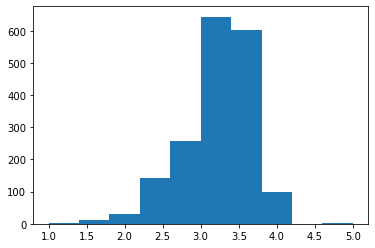

In [10]:
plt.hist(ratings)
plt.show()

##### A `1` is "unpleasant" chocolate, while a `5` is a bar that transcends "beyond the ordinary limits".

In [11]:
ten_best = df.Rating.nlargest(10)
print(ten_best)

78    5.0
86    5.0
9     4.0
17    4.0
20    4.0
54    4.0
56    4.0
76    4.0
77    4.0
83    4.0
Name: Rating, dtype: float64


In [12]:
df[df['Rating']==5.0]

,Company,Rating,CocoaPercentage,Origin,CompanyLocation
78,Amedei,5.0,70.0,Venezuela,Italy
86,Amedei,5.0,70.0,,Italy


### Which chocolatier makes the best chocolate?

find the 10 most highly rated chocolatiers

In [13]:
avg_rating = df.groupby('Company').Rating.mean()
ten_best = avg_rating.nlargest(10)
print(ten_best)

Company
Tobago Estate (Pralus)                  4.000000
Heirloom Cacao Preservation (Zokoko)    3.875000
Ocelot                                  3.875000
Amedei                                  3.846154
Matale                                  3.812500
Patric                                  3.791667
Acalli                                  3.750000
Benoit Nihant                           3.750000
Chocola'te                              3.750000
Christopher Morel (Felchlin)            3.750000
Name: Rating, dtype: float64


### Is more cocoa better?

to see if the chocolate experts tend to rate chocolate bars with higher levels of cacoa to be better than those with lower levels of cacoa.

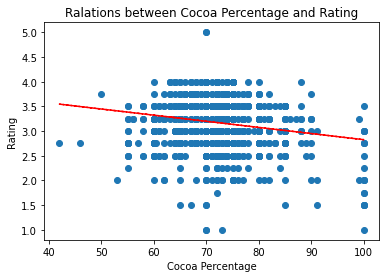

In [14]:
plt.clf() # to clear figures
plt.scatter(df.CocoaPercentage, df.Rating)

# Best fit line
z = np.polyfit(df.CocoaPercentage, df.Rating, 1)
line_function = np.poly1d(z)
plt.plot(df.CocoaPercentage, line_function(df.CocoaPercentage), "r--")
plt.title('Ralations between Cocoa Percentage and Rating')
plt.xlabel('Cocoa Percentage')
plt.ylabel('Rating')
plt.show()

### Where are the best cocoa beans grown? 

In [15]:
avg_percentage = df.groupby('Origin').CocoaPercentage.mean()
ten_best = avg_percentage.nlargest(10)
print(ten_best)

Origin
Peru, Ecuador                   99.000000
Guat., D.R., Peru, Mad., PNG    88.000000
Samoa                           85.000000
Venezuela/ Ghana                85.000000
Sao Tome & Principe             79.357143
Central and S. America          78.000000
Principe                        77.000000
Carribean                       76.250000
El Salvador                     75.000000
Gabon                           75.000000
Name: CocoaPercentage, dtype: float64


### Which countries produce the highest-rated bars?

In [16]:
avg_rating = df.groupby('CompanyLocation').Rating.mean()
ten_best = avg_rating.nlargest(10)
print(ten_best)

CompanyLocation
Chile          3.750000
Amsterdam      3.500000
Netherlands    3.500000
Philippines    3.500000
Iceland        3.416667
Vietnam        3.409091
Brazil         3.397059
Poland         3.375000
Guatemala      3.350000
Australia      3.348958
Name: Rating, dtype: float64


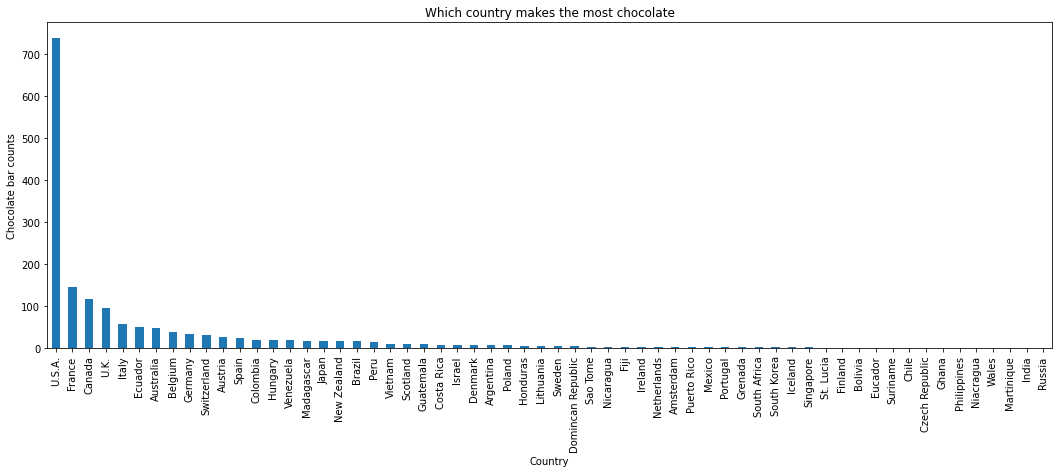

In [17]:
plt.figure(figsize=(18, 6))
value_counts = df['CompanyLocation'].value_counts()
value_counts.plot(kind='bar')
plt.title('Which country makes the most chocolate')
plt.xlabel('Country')
plt.ylabel('Chocolate bar counts')
plt.xticks(rotation=90)
plt.show()

## Conclusion
While the United States dominates chocolate bar production, the world's highest-rated bar hails from Italy, crafted by Amedei using Venezuelan cocoa beans with 70% cocoa content. However, my research reveals no clear correlation between chocolate bar ratings and factors like cocoa percentage, bean origin, or even the chocolate maker's reputation. This suggests that defining a "good" chocolate bar involves a more complex interplay of elements beyond these easily quantifiable attributes.